Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current eq

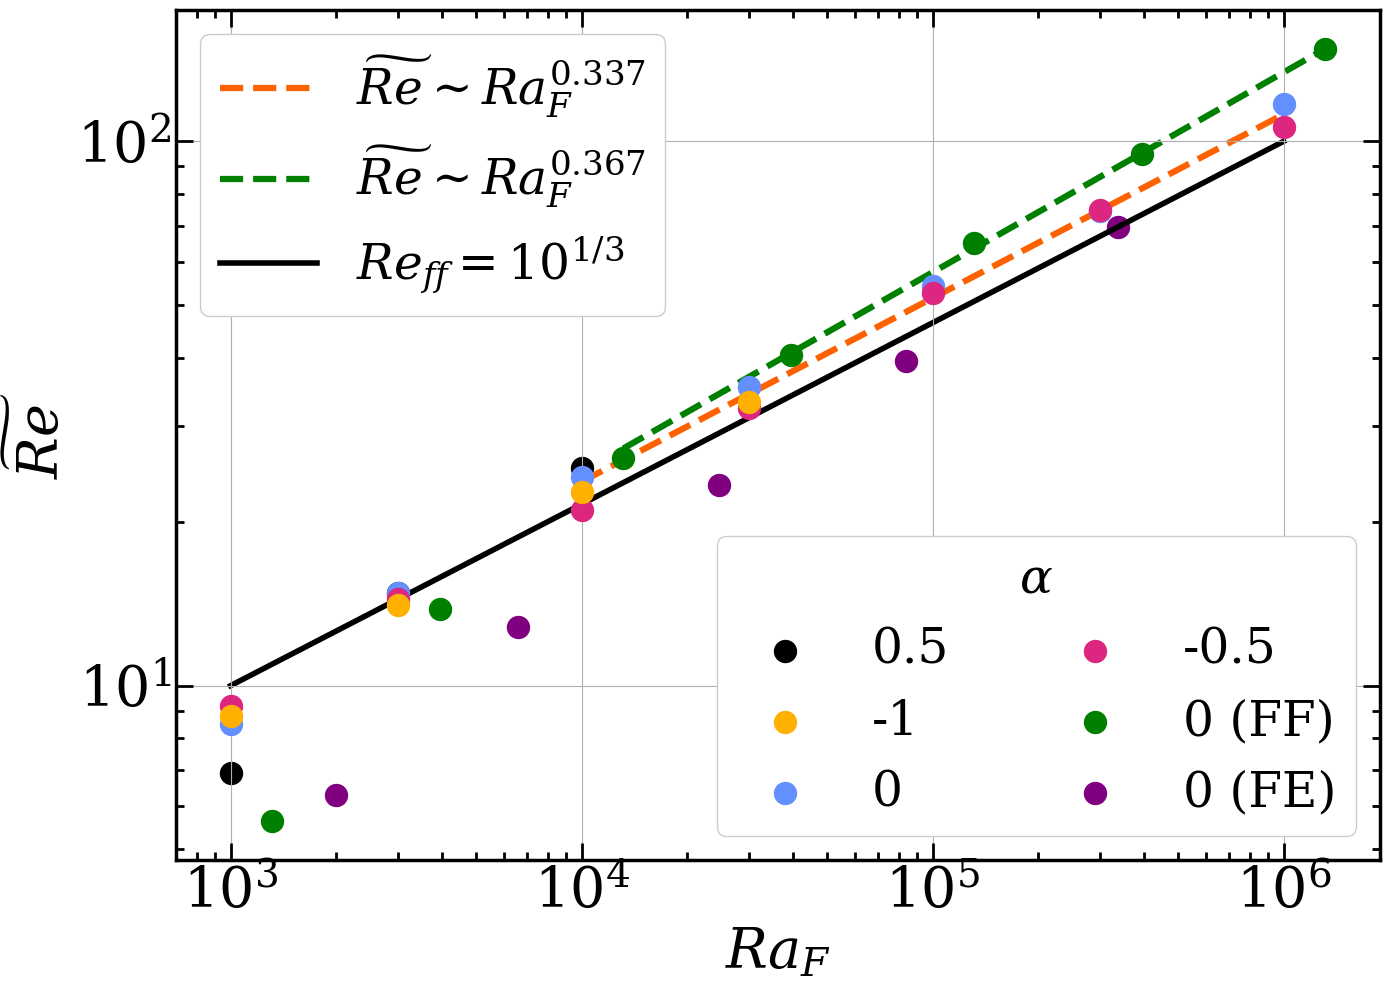

In [4]:
from reference_tools import equation_coefficients
from rayleigh_diagnostics import G_Avgs, Shell_Slices, Shell_Avgs
import survey_utilities as su
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit


direc = '/home/bjlazard/Rayleigh_Data/NR_project1/'
file = 'model_' 
suffix = '_G_Avgs.dat'

Raf_model = [1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6]
Raf_model4 = [1e3, 3e3, 1e4]
Raf_model_ff = [1.314e3, 3.94e3, 1.314e4, 3.94e4, 1.314e5, 3.94e5, 1.314e6] 
Raf_model_extra = [1.25e3, 1.5e3, 2e3]
Raf_model_fx = [1992.5982679097528, 6602.7635701334075, 24548.79834765906, 83775.0504486985, 337035.47201444005]


Re_mod1 = []
Re_mod2 = []
Re_mod3 = []
Re_mod4 = []
Re_mod1f = []
Re_mod1fx = []
Re_mod_extra1 = []
Re_mod_extra2 = []
Re_mod_extra3 = []


def powerlaw(x, a, b):
    x  = a*(x**b) 
    return x


#Loop over all files
for i in range(1, 19): 
    #Create file name and read in Global Averages
    infile = direc + file + str(i) + suffix
    ga = G_Avgs(infile, path = '')
    
    #Create file name and read in eq coefficients file
    eqfile = direc + 'eq_coeff/eq_' + str(i)
    eq = equation_coefficients(file = eqfile)
    su.nondimensional_parameters(eq)

    #Read in volume average viscosity
    nu_avg = eq.nu_avg

    #Calculate the Shell depth
    shell_depth = eq.radius[0]-eq.radius[eq.nr-1]

    #Calculate the viscous diffusion time
    tau_nu = (shell_depth*shell_depth)/nu_avg

    #Read in U
    usq_conv_index = 421      # Convective V (use this for rotating cases)
    usq_index = usq_conv_index
    usq = ga.vals[:,ga.lut[usq_index]]

    #Calculate the RMS velocity
    u = np.sqrt(usq)  # RMS (root mean square)

    #Calculate Re
    Re = u*shell_depth/nu_avg

    #Average the Re over the last 10% of the simulation
    niter = ga.niter
    Re_avg = np.average(Re[int(niter*0.9):])
    #print("Time-averaged Re = ", Re_avg)

    if i < 8:
        Re_mod1.append(Re_avg)
        #print('1')
    elif (i >= 8) and (i < 15):
        Re_mod2.append(Re_avg)
        #print('2')
    else:  
        Re_mod3.append(Re_avg)
        #print('3')
################## THIS IS THE END OF THE LOOP###################################



################################## START OF FIXED FLUX LOOP####################################################
#Loop over fixed flux models
for i in range(1, 8): 
    #Create file name and read in Global Averages
    infile = direc + file + str(i) + 'f' + suffix
    ga = G_Avgs(infile, path = '')
    
    #Create file name and read in eq coefficients file
    eqfile = direc + 'eq_coeff/eq_' + str(i) + 'f'
    eq = equation_coefficients(file = eqfile)
    su.nondimensional_parameters(eq)

    #Read in volume average viscosity
    nu_avg = eq.nu_avg

    #Calculate the Shell depth
    shell_depth = eq.radius[0]-eq.radius[eq.nr-1]

    #Calculate the viscous diffusion time
    tau_nu = (shell_depth*shell_depth)/nu_avg

    #Read in U
    usq_conv_index = 421      # Convective V (use this for rotating cases)
    usq_index = usq_conv_index
    usq = ga.vals[:,ga.lut[usq_index]]

    #Calculate the RMS velocity
    u = np.sqrt(usq)  # RMS (root mean square)

    #Calculate Re
    Re = u*shell_depth/nu_avg

    #Average the Re over the last 10% of the simulation
    niter = ga.niter
    Re_avg = np.average(Re[int(niter*0.9):])
    #print("Time-averaged Re = ", Re_avg)

    Re_mod1f.append(Re_avg)
    #print('1')
################## THIS IS THE END OF THE LOOP###################################

################################## START OF FIXED ENTROPY LOOP####################################################
#Loop over fixed flux models
for i in range(3, 8): 
    #Create file name and read in Global Averages
    infile = direc + file + str(i) + 'fx' + suffix
    ga = G_Avgs(infile, path = '')
    
    #Create file name and read in eq coefficients file
    eqfile = direc + 'eq_coeff/eq_' + str(i) + 'fx'
    eq = equation_coefficients(file = eqfile)
    su.nondimensional_parameters(eq)

    #Read in volume average viscosity
    nu_avg = eq.nu_avg

    #Calculate the Shell depth
    shell_depth = eq.radius[0]-eq.radius[eq.nr-1]

    #Calculate the viscous diffusion time
    tau_nu = (shell_depth*shell_depth)/nu_avg

    #Read in U
    usq_conv_index = 421      # Convective V (use this for rotating cases)
    usq_index = usq_conv_index
    usq = ga.vals[:,ga.lut[usq_index]]

    #Calculate the RMS velocity
    u = np.sqrt(usq)  # RMS (root mean square)

    #Calculate Re
    Re = u*shell_depth/nu_avg

    #Average the Re over the last 10% of the simulation
    niter = ga.niter
    Re_avg = np.average(Re[int(niter*0.9):])
    #print("Time-averaged Re = ", Re_avg)

    Re_mod1fx.append(Re_avg)
    #print('1')
################## THIS IS THE END OF THE LOOP###################################


###################### DO THE RE CALCULATION FOR alpha = 0.5 ##########################
for i in range(24, 21, -1):
    infile = direc + file + str(i) + suffix
    ga = G_Avgs(infile, path = '')

    #Create file name and read in eq coefficients file
    eqfile = direc + 'eq_coeff/eq_' + str(i)
    eq = equation_coefficients(file = eqfile)
    su.nondimensional_parameters(eq)

    #Read in volume average viscosity
    nu_avg = eq.nu_avg

    #Calculate the Shell depth
    shell_depth = eq.radius[0]-eq.radius[eq.nr-1]

    #Calculate the viscous diffusion time
    tau_nu = (shell_depth*shell_depth)/nu_avg

    #Read in U
    usq_conv_index = 421      # Convective V (use this for rotating cases)
    usq_index = usq_conv_index
    usq = ga.vals[:,ga.lut[usq_index]]

    #Calculate the RMS velocity
    u = np.sqrt(usq)  # RMS (root mean square)

    #Calculate Re
    Re = u*shell_depth/nu_avg

    #Average the Re over the last 10% of the simulation
    niter = ga.niter
    Re_mod4.append(np.average(Re[int(niter*0.9):]))
###################### END OF MODEL 22 CALCULATION ##############################################################


#Make 1 large array of all the Reynolds number and RaF number aside from the lowest Raf cases
Re_com = np.concatenate((Re_mod1[2:], Re_mod2[2:], Re_mod3[2:]))
Re_com = np.append(Re_com, Re_mod4[2:])

Raf_com = np.concatenate((Raf_model[2:], Raf_model[2:], Raf_model[2:4]))
Raf_com = np.append(Raf_com, Raf_model[2:3])



#This is for diffusivity^(-0.5)
popt, pcov = curve_fit(powerlaw, Raf_model[1:], Re_mod2[1:])
popt_f, pcov_f = curve_fit(powerlaw, Raf_model_ff[2:], Re_mod1f[2:]) #This is a fit for the fixed flux cases minus the first 3 points
popt_fx, pcov_fx = curve_fit(powerlaw, Raf_model_fx, Re_mod1fx)


#diffusivity^(0)
popt1, pcov1 = curve_fit(powerlaw, Raf_model[1:], Re_mod1[1:])

#Diffusivity^(-1)
popt2, pcov2 = curve_fit(powerlaw, Raf_model[1:4], Re_mod3[1:])

#THis is a fit to all the internal heating data besides the outliers
popt3, pcov3 = curve_fit(powerlaw, Raf_com, Re_com)


#Create arrays for theoretical Re ~ Raf^1/3
predicted_Raf = np.linspace(Raf_model[0], Raf_model[-1], 600)
predicted_Re = 1*predicted_Raf**(1/3)

predicted_Ras = np.linspace(4e3, 4e6, 600)
predicted_re = 0.19*predicted_Ras**(1/2)


#Setup the subplots for everything to be displayed
fig, ax = plt.subplots(1, figsize = (14, 10)) #, gridspec_kw = {'height_ratios': [4, 1]})
plt.setp(ax.spines.values(), linewidth=2.5)
#plt.setp(ax[1].spines.values(), linewidth=2)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"



Raf_com = sorted(Raf_com)
######################################## PLOT FITS AND DATA ############################
p1, = ax.plot(predicted_Raf, predicted_Re, linewidth=4, color='black', zorder=1, label=r'$Re_{ff} = 10^{1/3}$')
p3, = ax.plot(Raf_com, powerlaw(Raf_com, *popt3), linewidth=4.5, linestyle='dashed', color='#FE6100', zorder=1, label=r'$\widetilde{Re} \sim  Ra_F^{0.337}$')
p4, = ax.plot(Raf_model_ff[2:], powerlaw(Raf_model_ff[2:], *popt_f), linewidth=4.5, linestyle='dashed', color='green', zorder=1, label=r'$\widetilde{Re} \sim Ra_F^{0.367}$')

# Use the 's' parameter for marker size instead of 'linewidths'
marker_size = 250
d9 = ax.scatter(Raf_model_fx, Re_mod1fx, marker='o', s=marker_size, color='purple', zorder=1, label=r'0 (FE)')
d8 = ax.scatter(Raf_model[0:3], Re_mod4, marker='o', s=marker_size, color='black', zorder=1, label=r'0.5')
d1 = ax.scatter(Raf_model_ff, Re_mod1f, marker='o', s=marker_size, color='green', zorder=2, label=r'0 (FF)')
d2 = ax.scatter(Raf_model, Re_mod1, marker='o', s=marker_size, color='#648FFF', zorder=2, label=r'0')
d3 = ax.scatter(Raf_model, Re_mod2, marker='o', s=marker_size, color='#DC267F', zorder=2, label=r'-0.5')
d4 = ax.scatter(Raf_model[:4], Re_mod3, marker='o', s=marker_size, color='#FFB000', zorder=2, label=r'-1')

legend2 = plt.legend(handles=[p3, p4, p1], loc='upper left', fontsize=35, framealpha=1)
legend1 = plt.legend(ncol=2, handles=[d8, d4, d2, d3, d1, d9], title=r'$\alpha$', title_fontsize=35, loc='lower right', fontsize=35, framealpha=1)
ax.add_artist(legend2)

ax.set_ylabel(r'$\widetilde{Re}$', fontsize=40)
ax.set_xlabel(r'$Ra_F$', fontsize=40)
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid()

ax.tick_params(which='minor', top=True, direction='in', length=6, width=2, right=True, labelsize=40)
ax.tick_params(which='major', top=True, direction='in', length=12, width=2, right=True, labelsize=40)

plt.tight_layout()
plt.savefig('Reynolds.pdf', bbox_inches='tight', dpi=300)



Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current eq

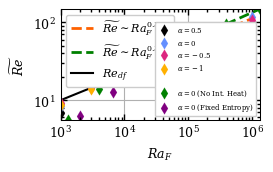

In [41]:
from reference_tools import equation_coefficients
from rayleigh_diagnostics import G_Avgs, Shell_Slices, Shell_Avgs
import survey_utilities as su
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit


direc = '/home/bjlazard/Rayleigh_Data/NR_project1/'
file = 'model_' 
suffix = '_G_Avgs.dat'

Raf_model = [1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6]
Raf_model4 = [1e3, 3e3, 1e4]
Raf_model_ff = [1.314e3, 3.94e3, 1.314e4, 3.94e4, 1.314e5, 3.94e5, 1.314e6] 
Raf_model_extra = [1.25e3, 1.5e3, 2e3]
Raf_model_fx = [1992.5982679097528, 6602.7635701334075, 24548.79834765906, 83775.0504486985, 337035.47201444005]


Re_mod1 = []
Re_mod2 = []
Re_mod3 = []
Re_mod4 = []
Re_mod1f = []
Re_mod1fx = []
Re_mod_extra1 = []
Re_mod_extra2 = []
Re_mod_extra3 = []


def powerlaw(x, a, b):
    x  = a*(x**b) 
    return x


#Loop over all files
for i in range(1, 19): 
    #Create file name and read in Global Averages
    infile = direc + file + str(i) + suffix
    ga = G_Avgs(infile, path = '')
    
    #Create file name and read in eq coefficients file
    eqfile = direc + 'eq_coeff/eq_' + str(i)
    eq = equation_coefficients(file = eqfile)
    su.nondimensional_parameters(eq)

    #Read in volume average viscosity
    nu_avg = eq.nu_avg

    #Calculate the Shell depth
    shell_depth = eq.radius[0]-eq.radius[eq.nr-1]

    #Calculate the viscous diffusion time
    tau_nu = (shell_depth*shell_depth)/nu_avg

    #Read in U
    usq_conv_index = 421      # Convective V (use this for rotating cases)
    usq_index = usq_conv_index
    usq = ga.vals[:,ga.lut[usq_index]]

    #Calculate the RMS velocity
    u = np.sqrt(usq)  # RMS (root mean square)

    #Calculate Re
    Re = u*shell_depth/nu_avg

    #Average the Re over the last 10% of the simulation
    niter = ga.niter
    Re_avg = np.average(Re[int(niter*0.9):])
    #print("Time-averaged Re = ", Re_avg)

    if i < 8:
        Re_mod1.append(Re_avg)
        #print('1')
    elif (i >= 8) and (i < 15):
        Re_mod2.append(Re_avg)
        #print('2')
    else:  
        Re_mod3.append(Re_avg)
        #print('3')
################## THIS IS THE END OF THE LOOP###################################



################################## START OF FIXED FLUX LOOP####################################################
#Loop over fixed flux models
for i in range(1, 8): 
    #Create file name and read in Global Averages
    infile = direc + file + str(i) + 'f' + suffix
    ga = G_Avgs(infile, path = '')
    
    #Create file name and read in eq coefficients file
    eqfile = direc + 'eq_coeff/eq_' + str(i) + 'f'
    eq = equation_coefficients(file = eqfile)
    su.nondimensional_parameters(eq)

    #Read in volume average viscosity
    nu_avg = eq.nu_avg

    #Calculate the Shell depth
    shell_depth = eq.radius[0]-eq.radius[eq.nr-1]

    #Calculate the viscous diffusion time
    tau_nu = (shell_depth*shell_depth)/nu_avg

    #Read in U
    usq_conv_index = 421      # Convective V (use this for rotating cases)
    usq_index = usq_conv_index
    usq = ga.vals[:,ga.lut[usq_index]]

    #Calculate the RMS velocity
    u = np.sqrt(usq)  # RMS (root mean square)

    #Calculate Re
    Re = u*shell_depth/nu_avg

    #Average the Re over the last 10% of the simulation
    niter = ga.niter
    Re_avg = np.average(Re[int(niter*0.9):])
    #print("Time-averaged Re = ", Re_avg)

    Re_mod1f.append(Re_avg)
    #print('1')
################## THIS IS THE END OF THE LOOP###################################

################################## START OF FIXED ENTROPY LOOP####################################################
#Loop over fixed flux models
for i in range(3, 8): 
    #Create file name and read in Global Averages
    infile = direc + file + str(i) + 'fx' + suffix
    ga = G_Avgs(infile, path = '')
    
    #Create file name and read in eq coefficients file
    eqfile = direc + 'eq_coeff/eq_' + str(i) + 'fx'
    eq = equation_coefficients(file = eqfile)
    su.nondimensional_parameters(eq)

    #Read in volume average viscosity
    nu_avg = eq.nu_avg

    #Calculate the Shell depth
    shell_depth = eq.radius[0]-eq.radius[eq.nr-1]

    #Calculate the viscous diffusion time
    tau_nu = (shell_depth*shell_depth)/nu_avg

    #Read in U
    usq_conv_index = 421      # Convective V (use this for rotating cases)
    usq_index = usq_conv_index
    usq = ga.vals[:,ga.lut[usq_index]]

    #Calculate the RMS velocity
    u = np.sqrt(usq)  # RMS (root mean square)

    #Calculate Re
    Re = u*shell_depth/nu_avg

    #Average the Re over the last 10% of the simulation
    niter = ga.niter
    Re_avg = np.average(Re[int(niter*0.9):])
    #print("Time-averaged Re = ", Re_avg)

    Re_mod1fx.append(Re_avg)
    #print('1')
################## THIS IS THE END OF THE LOOP###################################


###################### DO THE RE CALCULATION FOR alpha = 0.5 ##########################
for i in range(24, 21, -1):
    infile = direc + file + str(i) + suffix
    ga = G_Avgs(infile, path = '')

    #Create file name and read in eq coefficients file
    eqfile = direc + 'eq_coeff/eq_' + str(i)
    eq = equation_coefficients(file = eqfile)
    su.nondimensional_parameters(eq)

    #Read in volume average viscosity
    nu_avg = eq.nu_avg

    #Calculate the Shell depth
    shell_depth = eq.radius[0]-eq.radius[eq.nr-1]

    #Calculate the viscous diffusion time
    tau_nu = (shell_depth*shell_depth)/nu_avg

    #Read in U
    usq_conv_index = 421      # Convective V (use this for rotating cases)
    usq_index = usq_conv_index
    usq = ga.vals[:,ga.lut[usq_index]]

    #Calculate the RMS velocity
    u = np.sqrt(usq)  # RMS (root mean square)

    #Calculate Re
    Re = u*shell_depth/nu_avg

    #Average the Re over the last 10% of the simulation
    niter = ga.niter
    Re_mod4.append(np.average(Re[int(niter*0.9):]))
###################### END OF MODEL 22 CALCULATION ##############################################################


#Make 1 large array of all the Reynolds number and RaF number aside from the lowest Raf cases
Re_com = np.concatenate((Re_mod1[2:], Re_mod2[2:], Re_mod3[2:]))
Re_com = np.append(Re_com, Re_mod4[2:])

Raf_com = np.concatenate((Raf_model[2:], Raf_model[2:], Raf_model[2:4]))
Raf_com = np.append(Raf_com, Raf_model[2:3])



#This is for diffusivity^(-0.5)
popt, pcov = curve_fit(powerlaw, Raf_model[1:], Re_mod2[1:])
popt_f, pcov_f = curve_fit(powerlaw, Raf_model_ff[2:], Re_mod1f[2:]) #This is a fit for the fixed flux cases minus the first 3 points
popt_fx, pcov_fx = curve_fit(powerlaw, Raf_model_fx, Re_mod1fx)


#diffusivity^(0)
popt1, pcov1 = curve_fit(powerlaw, Raf_model[1:], Re_mod1[1:])

#Diffusivity^(-1)
popt2, pcov2 = curve_fit(powerlaw, Raf_model[1:4], Re_mod3[1:])

#THis is a fit to all the internal heating data besides the outliers
popt3, pcov3 = curve_fit(powerlaw, Raf_com, Re_com)


#Create arrays for theoretical Re ~ Raf^1/3
predicted_Raf = np.linspace(Raf_model[0], Raf_model[-1], 600)
predicted_Re = 1*predicted_Raf**(1/3)

predicted_Ras = np.linspace(4e3, 4e6, 600)
predicted_re = 0.19*predicted_Ras**(1/2)


#Setup the subplots for everything to be displayed
fig, ax = plt.subplots(1, figsize = (8.5/2.54, 6/2.54)) #, gridspec_kw = {'height_ratios': [4, 1]})
plt.setp(ax.spines.values(), linewidth=0.75)
#plt.setp(ax[1].spines.values(), linewidth=2)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"



Raf_com = sorted(Raf_com)
######################################## PLOT FITS AND DATA ############################
p1, = ax.plot(predicted_Raf, predicted_Re, linewidth = 1.5, color = 'black', zorder = 1, label = r'$Re_{df}$')
p3, = ax.plot(Raf_com, powerlaw(Raf_com, *popt3), linewidth = 2, linestyle = 'dashed', color = '#FE6100', zorder = 1, label = r'$\widetilde{Re} \sim   Ra_F^{0.337}$')
p4, = ax.plot(Raf_model_ff[2:], powerlaw(Raf_model_ff[2:], *popt_f), linewidth = 2, linestyle = 'dashed', color = 'green', zorder = 1, label = r'$\widetilde{Re} \sim Ra_F^{0.367}$')

d9 = ax.scatter(Raf_model_fx, Re_mod1fx, marker = 'd', linewidths = 0.1, color = 'purple', zorder = 1, label = r'$\alpha = 0$ (Fixed Entropy)')
d8 = ax.scatter(Raf_model[0:3], Re_mod4, marker = 'd', linewidths = 0.1, color = 'black', zorder = 1, label = r'$\alpha = 0.5$')
d1 = ax.scatter(Raf_model_ff, Re_mod1f, marker = 'd', linewidths = 0.1, color = 'green', zorder = 2, label = r'$\alpha = 0$ (No Int. Heat)')
d2 = ax.scatter(Raf_model, Re_mod1, marker = 'd', linewidths = 0.1, color = '#648FFF', zorder = 2, label = r'$\alpha = 0$')
d3 = ax.scatter(Raf_model, Re_mod2, marker = 'd', linewidths = 0.1, color = '#DC267F', zorder = 2, label = r'$\alpha = -0.5$')
d4 = ax.scatter(Raf_model[:4], Re_mod3, marker = 'd', linewidths = 0.1, color = '#FFB000', zorder = 2, label = r'$\alpha = -1$')
d10 = ax.scatter([10000, 10000], [20, 30], marker = 'd', linewidth = 0.1,  color = 'none', zorder = 2, label = ' ')


legend2 = plt.legend(handles = [p3, p4, p1], loc = 'upper left', fontsize = 8, framealpha = 1)
legend1 = plt.legend(handles = [d8, d2, d3, d4, d10, d1, d9], loc = 'lower right', fontsize = 5, framealpha = 1)
ax.add_artist(legend2)

ax.set_ylabel(r'$\widetilde{Re}$', fontsize = 9)
ax.set_xlabel(r'$Ra_F$', fontsize = 9)
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid()


ax.tick_params(which='minor', top = True, direction = 'in', length = 2, width = 1, right = True, labelsize = 9)
ax.tick_params(which='major', top = True, direction = 'in', length = 4, width = 1, right = True, labelsize = 9)
plt.margins(x=0, y=0)

plt.tight_layout(pad = 3)
plt.savefig('Reynolds.pdf', bbox_inches = 'tight', dpi = 300)
